<a href="https://colab.research.google.com/github/Satvik256/TestRepo/blob/master/mnist_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from fastai.basics import *
from fastai.vision import *

In [0]:
with gzip.open('/content/mnist.pkl.gz', 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')


In [3]:
x_train.shape

(50000, 784)

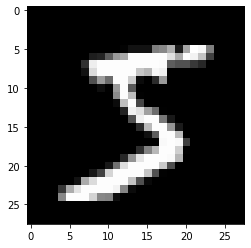

In [4]:
plt.imshow(x_train[0].reshape(28,28),cmap='gray')

In [0]:
x_train,y_train,x_valid,y_valid=map(torch.tensor,(x_train,y_train,x_valid,y_valid))

In [0]:
n,col=x_train.shape

In [0]:
train_ds=TensorDataset(x_train,y_train)
valid_ds=TensorDataset(x_valid,y_valid)

In [0]:
data=DataBunch.create(train_ds,valid_ds,bs=64)

In [0]:
x,y=next(iter(data.train_dl))

In [10]:
x.shape,y.shape

(torch.Size([64, 784]), torch.Size([64]))

In [11]:
doc(DataBunch.create)

In [12]:
doc(Dataset)

In [0]:
class mnist_logistic(nn.Module):
  def __init__(self):
    super().__init__()
    self.lin=nn.Linear(784,10)
  def forward(self,xb): return self.lin(xb)
  def printxb(self):print(self.lin)  

In [0]:
model=mnist_logistic().cuda()

In [15]:
model

mnist_logistic(
  (lin): Linear(in_features=784, out_features=10, bias=True)
)

In [16]:
model(x).shape

torch.Size([64, 10])

In [17]:
[p.shape for p in model.parameters()]

[torch.Size([10, 784]), torch.Size([10])]

In [0]:
lr=2e-2

In [0]:
loss_func=nn.CrossEntropyLoss()

In [0]:
def update(x,y,lr):
  wd=1e-5
  y_pred=model(x)
  w2=0
  for p in model.parameters():w2+=(p**2).sum()
  loss=loss_func(y_pred,y)+w2*wd
  loss.backward()
  with torch.no_grad():
    for p in model.parameters():
      p-=(lr*p.grad)
      p.grad.zero_()
  return loss.item()    

In [0]:
losses=[update(x,y,2e-2) for x,y in data.train_dl]

In [22]:
len(losses)

781

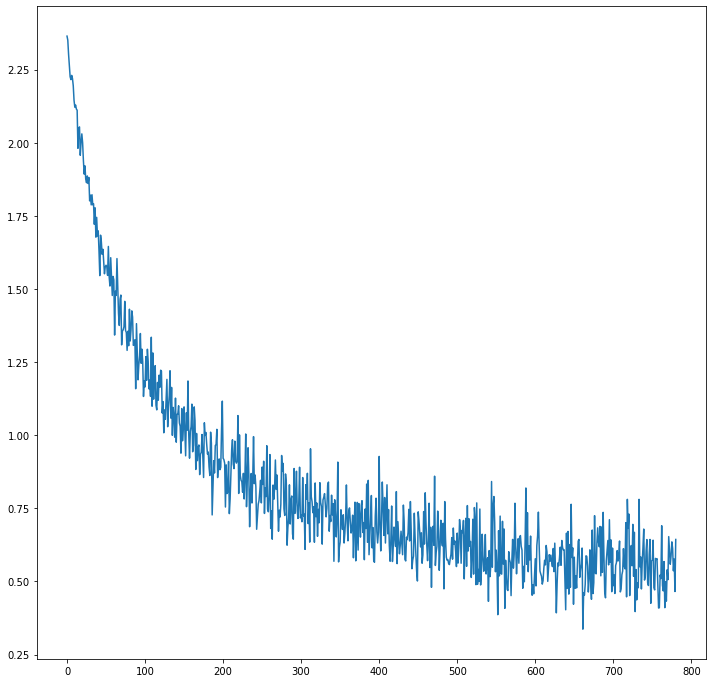

In [23]:
plt.figure(figsize=(12,12))
plt.plot(losses);

In [0]:
class mnist_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(784, 50, bias=True)
        self.lin2 = nn.Linear(50, 10, bias=True)

    def forward(self, xb):
        x = self.lin1(xb)
        x = F.relu(x)
        return self.lin2(x)

In [0]:
model=mnist_NN().cuda()

In [0]:
losses_2=[update(x,y,2e-2) for x,y in data.train_dl]

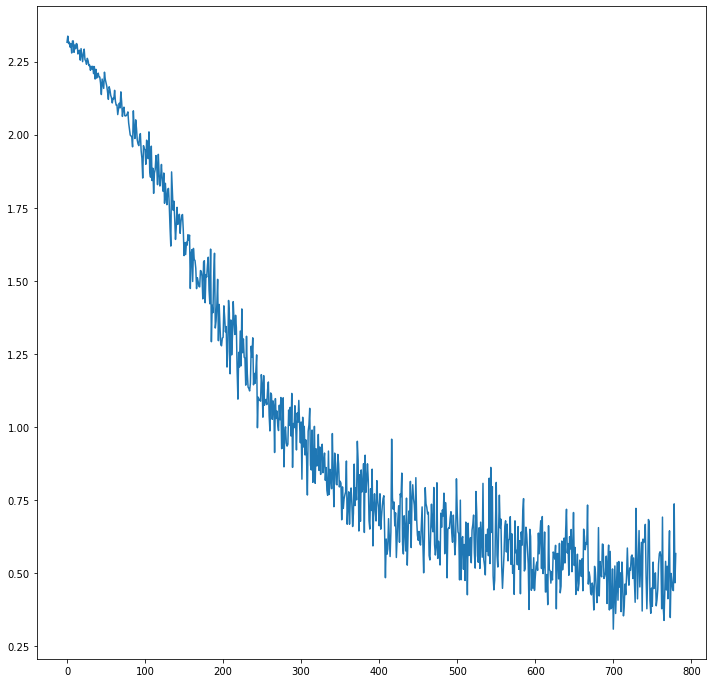

In [27]:
plt.figure(figsize=(12,12))
plt.plot(losses_2);

In [28]:
min(losses_2),min(losses)

(0.30904215574264526, 0.3370335102081299)

In [0]:
model=mnist_NN().cuda()

In [0]:
def update(x,y,lr):
  opt=optim.Adam(model.parameters(),lr,weight_decay=1e-5)
  y_pred=model(x)
  loss=loss_func(y_pred,y)
  loss.backward()
  opt.step()
  opt.zero_grad()
  return loss.item()

In [0]:
losses_3=[update(x,y,1e-3) for x,y in data.train_dl]

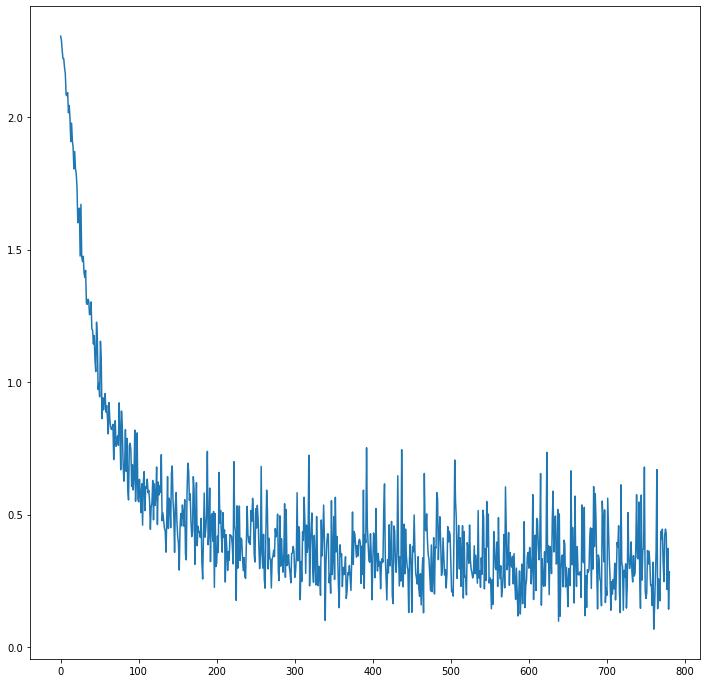

In [32]:
plt.figure(figsize=(12,12))
plt.plot(losses_3)

In [33]:
min(losses_3)

0.06812524795532227

In [0]:
learn=Learner(data,mnist_NN(),loss_func=loss_func,metrics=accuracy)

In [46]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


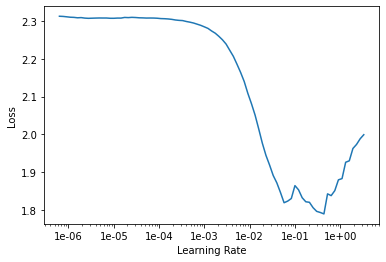

In [47]:
learn.recorder.plot()

In [48]:
learn.fit_one_cycle(16,2e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.267519,0.221755,0.938800,00:03
1,0.195079,0.205751,0.934900,00:03
2,0.202611,0.192076,0.946100,00:03
3,0.198672,0.204622,0.949500,00:03
4,0.218340,0.218978,0.946500,00:03
5,0.168206,0.185183,0.954200,00:03
6,0.174558,0.168266,0.955800,00:03
7,0.170552,0.175766,0.957100,00:03
8,0.125358,0.164551,0.962300,00:03
9,0.103336,0.162724,0.963600,00:03


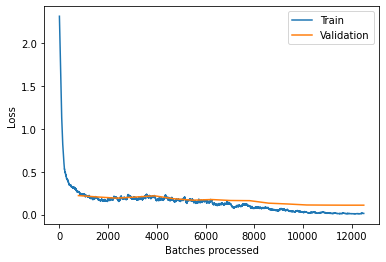

In [49]:
learn.recorder.plot_losses()

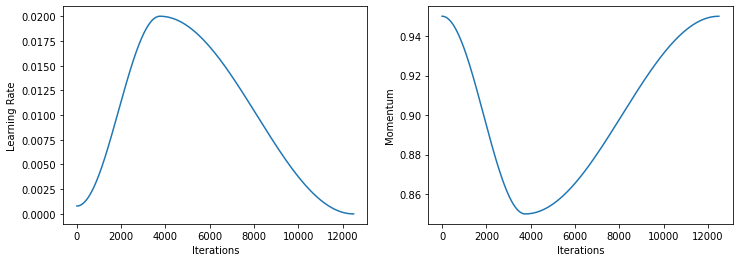

In [51]:
learn.recorder.plot_lr(show_moms=True)